# Computer Infrastructure

This document will contain solutions/workings for the Computer Infrastructure module, the tasks completed in this are from the [problems.md](https://github.com/ianmcloughlin/computer-infrastructure/blob/main/assessment/problems.md) document for this module.
The assessment details can be found in [assessment.md](https://github.com/ianmcloughlin/computer-infrastructure/blob/main/assessment/assessment.md) and in the [guidance notebook](https://github.com/ianmcloughlin/computer-infrastructure/blob/main/assessment/guidance.ipynb).

Splitting this notebook into a number of different sections so that the problems can be completed consecutively.

## Problem 1: Getting the data

For this project the [yfinance](https://github.com/ranaroussi/yfinance/blob/main/README.md) package will be used. I used [https://www.youtube.com/watch?v=SxIwqdedomg](https://www.youtube.com/watch?v=SxIwqdedomg) for installing yfinance.

From this, all hourly data for the previous 5 days for the 5 FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)

 File names will use the following format: YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September, 11 for November etc.), followed by the two digit day, and HHmmss is hour, minutes, seconds. To ensure correct file naming [https://forum.enterprisedna.co/t/adding-a-datetime-to-the-name-of-the-file/45592/4](https://forum.enterprisedna.co/t/adding-a-datetime-to-the-name-of-the-file/45592/4) and [https://community.jmp.com/t5/Discussions/Format-Date-Time-yyyymmdd-hhmmss/td-p/694172](https://community.jmp.com/t5/Discussions/Format-Date-Time-yyyymmdd-hhmmss/td-p/694172) were used.

In [ ]:
# First need to make sure the correct modules are installed.
# I decided to add all of these libraries because they are commonly used for data analysis and visualization and are allowed according to the requirements.
# See: https://github.com/ianmcloughlin/computer-infrastructure/blob/main/requirements.txt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import datetime
import statsmodels as sm
import scipy as spy

It was important that while importing the data, needed to make sure to name it as appropriate in order to save it in an easily understandable and readable manner.

Need to first find out how to download the data for the FAANG stocks. All the hourly data for the past 5 days is required so this will be part of the process. See the [StackOverflow page](https://stackoverflow.com/questions/74479906/how-to-get-aggregate-4hour-bars-historical-stock-data-using-yfinance-in-python) for an example of collecting data over the last 2 years hourly - this will be adapted to be for the last 5 days and hourly. When importing the data and make sure that it's labelled appropriately so that each of the 5 FAANG can be differentiated from one another. 

```
faang5_data = yf.download(tickers="AAPL AMZN META GOOG NFLX", period="5d", interval="1h") 
```
Where:
- `tickers="AAPL AMZN META GOOG NFLX"` is the company(ies) where the stock data is to be saved for.
- `period="5d"` is the period for which the data should be saved for.
- and `interval="1h"` is the intervals at which the data for each of the tickers should be included in the dataframe. 

In [ ]:
# This code downloads the hourly data for the last 5 days for the 5 FAANG stocks (Facebook, Apple, Amazon, Netflix, Google) using the yfinance package.

faang5_data = yf.download(tickers="AAPL AMZN META GOOG NFLX", period="5d", interval="1h") # adapted from https://stackoverflow.com/questions/74479906/how-to-get-aggregate-4hour-bars-historical-stock-data-using-yfinance-in-python

def get_data(faang5_data): 
    print(faang5_data) # to check it works
    return faang5_data

# Now need to call the function to get the data
get_data(faang5_data)


I wanted to make sure that the files are saving to the correct location. I accidentally saved the data into a new folder that was in the higher file on my PC so I decided that an absolute path was the best way to go to minimise problems (I'll to the same with the plots later).

Originally the code written was:

```# I kept getting an error that the folder didn't exist so I created it manually in the root repository.
# So now I need to check that the directory exists before trying to save the file.
import os
output_dir = r"D:\Data_Analytics\Modules\CI\computer-infrastructure\data-faang-stocks"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    # Get the absolute path of the output directory
absolute_output_dir = os.path.abspath(output_dir)
```

Correction. 

Following Automation the above code has been modified so that the entire directory line is no longer inputted, only the file location for the save is input.

In [ ]:
import os
output_dir = r"data-faang-stocks/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    # Get the absolute path of the output directory
absolute_output_dir = os.path.abspath(output_dir)

Save data as csv in correct format name. I wanted to be sure that every file would be saved correctly in the `YYYYMMDD-HHmmss.csv` format. In the name `YYYYMMDD` gives the year (e.g. 2025) followed by the month (10 for October), followed by the date (e.g. 02 for 2nd).

In [ ]:
# Now to save it as a .csv file in a folder called data-faang-stocks in the root repository with the correct naming format YYYYMMDD-HHmmss.csv.
# Save the data to a CSV file
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_path = os.path.join(absolute_output_dir, f"{current_time}.csv")
faang5_data.to_csv(file_path, index=False)

Verify save file:

- The location it saved to.
- The absolute path to the file directory.
- A list of the files within the directory.

In [ ]:
# Verify the file was saved
print(f"File saved at: {file_path}")
print(f"Absolute path to output directory: {absolute_output_dir}")
print("Files in directory:", os.listdir(output_dir))

Although the above code saved the file correctly, it did not however keep the time and date of each of the bits of data. I modified the code modifying it by removing the `index=False` argument, and replacing it with `date_format='%Y-%m-%d %H:%M:%S'`. The method for doing this was adapted  from [StackOverflow page](https://stackoverflow.com/questions/30298144/datetime-format-change-when-save-to-csv-file-python).

In [ ]:
# Now to save it as a .csv file in a folder called data-faang-stocks in the root repository with the correct naming format YYYYMMDD-HHmmss.csv. and make sure I don't lose the date and time index.
# Save the data to a CSV file
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_path = os.path.join(absolute_output_dir, f"{current_time}.csv")
faang5_data.to_csv(file_path, date_format='%Y-%m-%d %H:%M:%S') # adapted from https://stackoverflow.com/questions/30298144/datetime-format-change-when-save-to-csv-file-python

## Problem 2: Plotting Data

For this part of the project I decided to use my work from the PANDS project from term 1 (2025) for saving images and exporting stuff to folders [HERE](https://github.com/KaiiMenai/pands-project), specifically in the [analysis.py](https://github.com/KaiiMenai/pands-project/blob/main/analysis.py) program.

Defining the function.
Although this was rather long winded, I wanted to ensure that there were things in place should the data not be found, so that I could go back and fix the error. The first thing to do was to check that there were indeed csv files present in the specified directory.

In [ ]:
def plot_data():
    # Get the list of files in the directory
    files = os.listdir(absolute_output_dir)
    # Filter out only CSV files
    csv_files = [f for f in files if f.lower().endswith('.csv')]
    if not csv_files:
        print(f"No CSV files found in {absolute_output_dir}")
        return

Now that it has been determined that there are csv files present, they needed to be put in date-time order so that only the most recent file would be used for the plot.

In [ ]:

    # Sort the files by modification time in descending order and pick latest
    csv_files.sort(key=lambda x: os.path.getmtime(os.path.join(absolute_output_dir, x)), reverse=True)
    latest_file = csv_files[0]
    latest_file_path = os.path.join(absolute_output_dir, latest_file)
    print(f"Using latest CSV: {latest_file}")

The tickers (data sources) needed to be listed next.

- AAPL - Apple
- AMZN - Amazon
- META - Meta (facebook, Instagram, WhatsApp)
- GOOG - Google
- NFLX - Netflix

In [ ]:
    tickers = ["AAPL", "AMZN", "META", "GOOG", "NFLX"]

After a few tries and manual checks, I realised that the csv file was saving with multi-line headers. The file was to be saved with a 3-line header [Price / Ticker / Datetime](https://sparkbyexamples.com/pandas/pandas-multiindex-dataframe-examples/#:~:text=Pandas%20MultiIndex%20to%20Columns,to%20DataFrame%20starting%20from%20zero).
To mitigate this as an issue, I needed to ensure that some of the lines in the csv were skipped ([1](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02/), [2](https://pandas.pydata.org/docs/user_guide/advanced.html), and [3](https://www.datacamp.com/tutorial/pandas-read-csv)).

In [ ]:
    # Try reading the CSV that was saved with a 3-line header (Price / Ticker / Datetime) https://sparkbyexamples.com/pandas/pandas-multiindex-dataframe-examples/#:~:text=Pandas%20MultiIndex%20to%20Columns,to%20DataFrame%20starting%20from%20zero.
    try:
        # The CSV has a multi-row header: first row contains Price/Close/High/..., second the tickers. - https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02/, https://pandas.pydata.org/docs/user_guide/advanced.html
        # The third row in the file contains the literal 'Datetime' in the first column which will be skipped.
        data = pd.read_csv(latest_file_path, header=[0, 1], skiprows=[2], index_col=0, parse_dates=True)
    except Exception as e:
        print("Warning: failed to read CSV with MultiIndex header, trying fallback. Error:", e) # This will help find error cause.
        # Try to read normally and attempt to promote the first data row to column level 1 if it contains tickers - not entirely necessary but noted just incase
        data = pd.read_csv(latest_file_path, index_col=0, parse_dates=True)
        # If the first row contains ticker symbols, promote it to second-level header -  https://www.datacamp.com/tutorial/pandas-read-csv
        try:
            first_row = data.iloc[0]
            # if the first row contains one of the expected tickers, use it as second header 
            if any(str(x) in tickers for x in first_row.values):
                new_cols = pd.MultiIndex.from_arrays([data.columns, first_row.values])
                data = data[1:]
                data.columns = new_cols
                data.index = pd.to_datetime(data.index)
                print("Promoted first data row to MultiIndex column level")
        except Exception:
            # If anything goes wrong, continue available columns will be detected with the following
            pass

To ensure that the plot would only contain the essential data - closing prices for each of the companies (tickers) hourly, for the 5 days prior to the csv creation date, a [specific dataframe](https://realpython.com/pandas-dataframe/) `close_df` was created.

In [ ]:
    # Make a dataframe of closing prices called close_df. - https://realpython.com/pandas-dataframe/
    close_df = None
    if isinstance(data.columns, pd.MultiIndex): # Using the if/else will help avoid errors if the CSV doesn't have multi-level columns. (but I know it does after a manual check).
        # Normally, it will be: top-level contains 'Close', second-level contains tickers
        if 'Close' in data.columns.get_level_values(0):
            close_df = data['Close']
        else:
            # Try to find a top-level name that includes 'Close'
            top_levels = list(dict.fromkeys(data.columns.get_level_values(0)))
            print("Top-level column names found:", top_levels)
            for name in top_levels:
                if 'Close' in str(name):
                    close_df = data[name]
                    break
    else:
        # Single-level columns: try to find columns that mention 'Close'
        close_cols = [c for c in data.columns if 'Close' in str(c)]
        if close_cols:
            close_df = data[close_cols]


Should the `close_df`not be created, then an error message will be raised.

In [ ]:
    if close_df is None:
        print("Could not find 'Close' columns. Available columns (first 30):")
        print(list(data.columns)[:30])
        raise KeyError("Close columns not found in CSV - file format not recognised")

Now for the plots themselves. Using the `close_df` previously created from the most recent saved csv, the closing share prices for each of the 5 tickers (companies) was created.
The figure size was specified, values were checked to make sure that they were numeric (otherwise there would be an error in the plotting), and should there be any missing closing values for any of the tickers, then a message would be given `"Ticker {ticker} not found in Close data; available: {list(close_df.columns)}")`.

In [ ]:
    # Plot the closing prices of each stock over time (only when available) - this will be done per hourly data over the 5 days of the data (included in the .csv).
    fig, ax = plt.subplots(figsize=(14, 7))
    for ticker in tickers:
        if ticker in close_df.columns:
            # Make sure values are numeric
            series = pd.to_numeric(close_df[ticker], errors='coerce')
            ax.plot(series.index, series.values, label=ticker)
        else:
            print(f"Ticker {ticker} not found in Close data; available: {list(close_df.columns)}")

Setting the details for the plot itself:

- Plot title - "FAANG Stock Closing Prices - {latest_file.split('.')[0]}" - Latest file name will be in the date-time format.
- x axis label - Date
- y axis label - Closing Price (USD)
- inclusion of a legend
- putting a grid on the plot
- making sure that the plots have a tight layout.

Following the adding of the specifications to the plot, the plot was shown, and in order to make the plot easier for access for saving the custom function was then referred to as fig, `fig = plot_data()`.

In [ ]:
    ax.set_title(f"FAANG Stock Closing Prices - {latest_file.split('.')[0]}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Closing Price (USD)")
    ax.legend()
    ax.grid()
    fig.tight_layout()
    # Show the plot interactively (optional) and return the Figure so it can be saved
    plt.show()
    return fig
    
# Now to call the function to plot the data and capture the Figure for saving
fig = plot_data() # easier to access for saving.

For saving the plots I decided to keep the same format for saving as I did for the csv files. I did this by first specifying the save location. Again, following automation I realised the error I had initially made, I have only copied the corrected version into this notebook.

In [ ]:
output_plot_dir = r"plots-faang-stocks/"
if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)
    # Get the absolute path of the output directory
absolute_output_plot_dir = os.path.abspath(output_plot_dir)

I also decided to use the current time as the file name. As this would run straight away following the saving of the csv data file, the date-time for the plot png would correspond to that of the csv. I used the same reference for saving the named in the datetime format.

In [ ]:
# Save the plot to a PNG file using the returned Figure - modified code from what was being used for csv saving
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
file_plot_path = os.path.join(absolute_output_plot_dir, f"{current_time}.png")
if fig is not None:
    try:
        fig.savefig(file_plot_path, bbox_inches='tight', dpi=150)
    except Exception as e:
        print(f"Failed to save figure: {e}")
else:
    print("No figure returned from plot_data(); nothing to save.")

Finally, I wanted to check that the png file saved correctly. For this I made sure that the output would print out the file location, the directory path, and list all of the files in the save location.

In [ ]:
# Verify the file was saved
print(f"File saved at: {file_plot_path}")
print(f"Absolute path to output directory: {absolute_output_plot_dir}")
print("Files in directory:", os.listdir(output_plot_dir))

## Problem 3: Script

FROM THE TASK OUTLINE

What this problem involves:

Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

**AGAIN, refer to the PANDS project for the function for aid in the run and save parts of the script.**

In codespaces the list of files and folders in the computer infrastructure repository is noted in screenshot 1.

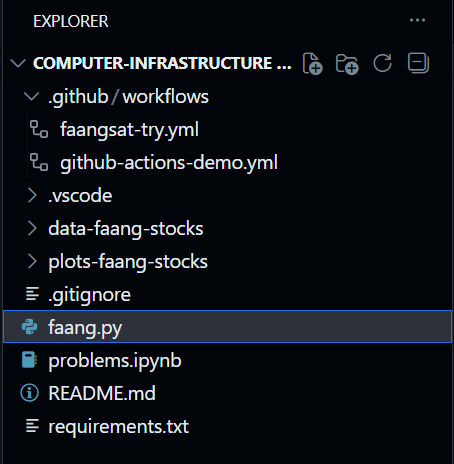 (Screenshot 1)

The screenshot below (Screenshot 2) is what the [faang.py](https://github.com/KaiiMenai/computer-infrastructure/blob/main/faang.py) file looks like when opened in github.

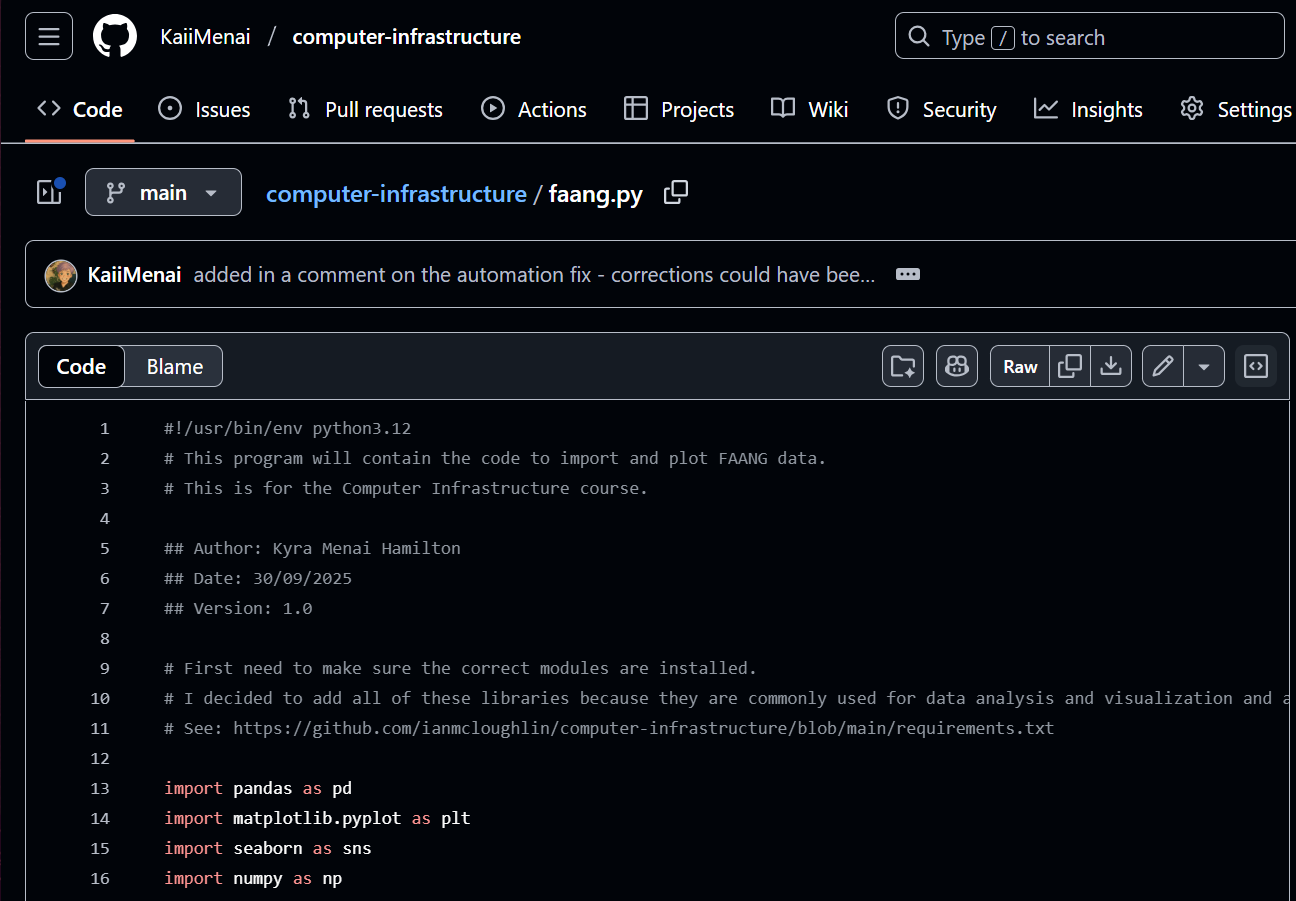 (Screenshot 2)

## Problem 4: Automation

FROM THE TASK OUTLINE

What this problem involves:

Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

References to help with this task:

- [GitHub Actions workflow](https://docs.github.com/en/actions)
- [CI/CD Tutorial using GitHub Actions - Automated Testing & Automated Deployments](https://youtu.be/YLtlz88zrLg) on YT
- [trigger GitHub Actions on every Saturday](https://stackoverflow.com/questions/75974691/how-can-i-trigger-github-actions-on-every-3rd-saturday-of-a-month) on StackOverflow
- [Run on a schedule](https://jasonet.co/posts/scheduled-actions)


- STEP BU STEP - https://medium.com/@songulerdemguler/running-scheduled-code-on-github-8e6a03a8d88b

# END